In [47]:
#!pip install matplotlib
#!pip install pandas

import pandas as pd

catalogo_nosso = '/home/vpn/Downloads/NetflixTotal.pd'
catalogo_com_data = '/home/vpn/Downloads/NetflixTotal.data.po'
assistidos = pd.read_csv(catalogo_nosso)
assistidos.head(10)

,Unnamed: 0,titulo,generos,id,nomeCompleto
0,0,Intrigas de estado,Filmes de suspense|Suspenses policiais|Thrille...,70102779,Intrigas de estado
1,1,Morte às Seis da Tarde,Filmes poloneses|Filmes de suspense|Suspenses ...,81221656,Morte às Seis da Tarde
2,2,O Juiz,Dramas|Dramas sobre julgamentos|Dramas policiais,70305896,O Juiz
3,3,"Bom Dia, Verônica",Séries baseadas em livros|Programas e séries b...,80999057,"Bom Dia, Verônica: Temporada 1: ""A mulher que ..."
4,4,"Bom Dia, Verônica",Séries baseadas em livros|Programas e séries b...,80999056,"Bom Dia, Verônica: Temporada 1: ""Voa, Passarinha"""
5,5,Sherlock,Britânico|Séries dramáticas sobre crimes|Série...,70297466,"Sherlock: Temporada 3: ""O sinal dos três"""
6,6,"Bom Dia, Verônica",Séries baseadas em livros|Programas e séries b...,80999055,"Bom Dia, Verônica: Temporada 1: ""A Gaiola"""
7,7,Sherlock,Britânico|Séries dramáticas sobre crimes|Série...,70297465,"Sherlock: Temporada 3: ""O caixão vazio"""
8,8,"Bom Dia, Verônica",Séries baseadas em livros|Programas e séries b...,80999054,"Bom Dia, Verônica: Temporada 1: ""Fora da Caixa"""
9,9,"Bom Dia, Verônica",Séries baseadas em livros|Programas e séries b...,80998552,"Bom Dia, Verônica: Temporada 1: ""Ciao, Princip..."


In [41]:
assistidos_data = pd.read_csv(catalogo_com_data)
assistidos_data.head(10)

,data,filmeid,nomeitem
0,02/01/2021,70102779,Intrigas de estado
1,01/01/2021,81221656,Morte às Seis da Tarde
2,30/12/2020,70137790,Burlesque
3,29/12/2020,70305896,O Juiz
4,15/12/2020,80999057,"Bom Dia, Verônica: Temporada 1: ""A mulher que ..."
5,15/12/2020,80999056,"Bom Dia, Verônica: Temporada 1: ""Voa, Passarinha"""
6,14/12/2020,70297466,"Sherlock: Temporada 3: ""O sinal dos três"""
7,14/12/2020,80999055,"Bom Dia, Verônica: Temporada 1: ""A Gaiola"""
8,12/12/2020,70297465,"Sherlock: Temporada 3: ""O caixão vazio"""
9,06/12/2020,80999054,"Bom Dia, Verônica: Temporada 1: ""Fora da Caixa"""


In [42]:
assistidos_unicidade=assistidos.drop_duplicates(subset=['titulo'])
generos = assistidos_unicidade.generos.str.get_dummies()


In [43]:
of = pd.DataFrame(generos.sum())
of.columns=['qtd']
of['nome']=of.index
#of.index = [i for i in range(len(of))]
condicao = (of.qtd <= generos.sum().max()) & (of.qtd > 10)

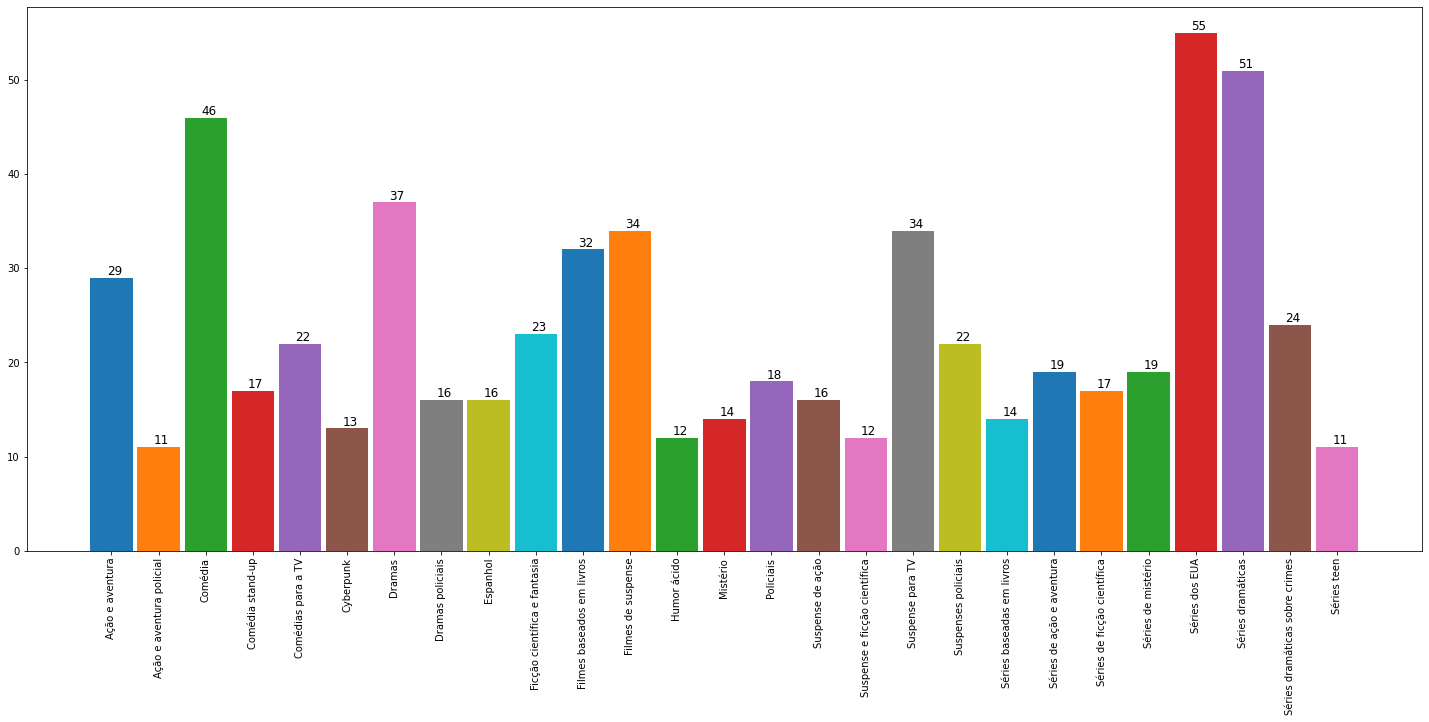

In [45]:
import matplotlib.pyplot as plt

barWidth=0.9
eixo_x = [i for i in range(len(of[condicao])) ]
legendas = [ f'{i}' for i in of[condicao].index.values ]
barra_valores = of[condicao].qtd

cores = ["#1f77b4","#ff7f0e","#2ca02c","#d62728","#9467bd","#8c564b","#e377c2","#7f7f7f","#bcbd22","#17becf"]

# Create barplot
plt.figure(figsize=(25,10))
plt.bar(eixo_x, barra_valores, width = barWidth, color = cores, label='Qtd')

# Create legend
#plt.legend()

# Text below each barplot with a rotation at 90°
plt.xticks([r for r in range(len(of[condicao]))], legendas, rotation=90)

# Text on the top of each barplot
for i in range(len(barra_valores)):
  plt.text(x = eixo_x[i]-0.1 , y = barra_valores[i]+0.3, s = barra_valores[i], size = 12)
  #plt.text(x = eixo_x[i]-0.5 , y = barra_valores[i]-len(legendas[i])+4, s = legendas[i], size = 12, rotation=90)

# Adjust the margins
#plt.subplots_adjust(bottom= 0.2, top = 0.98)

# Show graphic
plt.show()